<a href="https://colab.research.google.com/github/avishek-astra/Deep_Learning_Experiments/blob/main/overfitting_scikitlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
#importing libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
#NEW!
from sklearn.model_selection import train_test_split


<ipython-input-29-167363004367>:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


Import and process the data

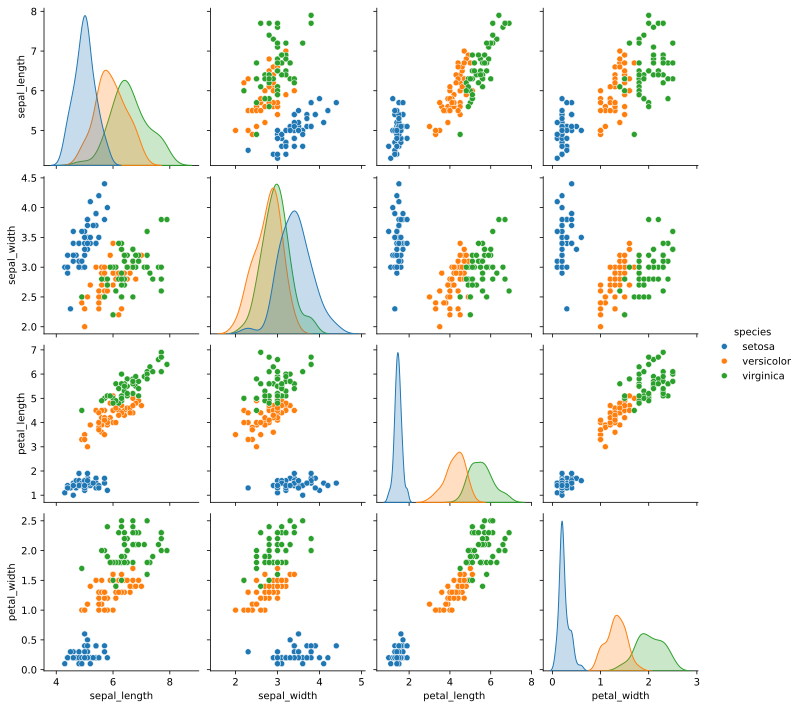

In [30]:
#import dataset(comes with seaborn)
import seaborn as sns
iris=sns.load_dataset('iris')
#check out the first few lines of data
iris.head()
#plot to show the data
sns.pairplot(iris, hue='species')
plt .show()

In [31]:
#create our fake dataset
fakedata=np.tile(np.array([1,2,3,4]),(10,1))+np.tile(10*np.arange(1,11),(4,1)).T
fakelabels=np.arange(10)>4
print(fakedata),print(' ')
print(fakelabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]
 
[False False False False False  True  True  True  True  True]


In [32]:
#use scikitlearrn to split the data
train_data,test_data,train_labels,test_labels=train_test_split(fakedata,fakelabels,test_size=0.2)
#print out the sizes
print('Training data size:'+str(train_data.shape))
print('Training labels size:'+str(train_labels.shape))
print(' ')
print(train_data)
print(' ')
print('Test data size:'+str(test_data.shape))
print('Test labels size:'+str(test_labels.shape))
print(test_data)

Training data size:(8, 4)
Training labels size:(8,)
 
[[51 52 53 54]
 [81 82 83 84]
 [21 22 23 24]
 [71 72 73 74]
 [61 62 63 64]
 [41 42 43 44]
 [11 12 13 14]
 [31 32 33 34]]
 
Test data size:(2, 4)
Test labels size:(2,)
[[ 91  92  93  94]
 [101 102 103 104]]


In [33]:
#organize the data
#convert form pandas dataframe to tensor
data=torch.tensor(iris[iris.columns[0:4]].values).float()
#transform species to number
labels=torch.zeros(len(data), dtype=torch.long)
#  0 not needed becauuse it is already initialized above
labels[iris.species=='versicolor']=1
labels[iris.species=='virginica']=2

labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

Create the ANN model

In [15]:
#model architecture
def createANewModel():
  ANNiris=nn.Sequential(
      nn.Linear(4,64),#input layer
      nn.ReLU(),
      nn.Linear(64,64),
      nn.ReLU(),
      nn.Linear(64,3)
       )
  #loss function
  lossfun=nn.CrossEntropyLoss()
  #optimizer
  optimizer=torch.optim.SGD(ANNiris.parameters(), lr=0.01)
  return ANNiris,lossfun, optimizer

Train the model


In [40]:
numepochs=1000
#initialize losses
def trainTheModel(trainprop):
  #initialize losses
  losses=torch.zeros(numepochs)
  trainAcc=[]
  testAcc=[]
  X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=trainprop)
  #loop over epochs
  for epochi in range(numepochs):
    #forward pass
    yHat=ANNiris(X_train)
    #compute loss
    loss=lossfun(yHat,y_train)
    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #compute  trainaccuracy

    trainAcc.append(100*(torch.mean((torch.argmax(yHat,axis=1)==y_train).float()).item()))
    # compute test accuracy
    predictions=ANNiris(X_test)
    predlabels=torch.argmax(predictions,axis=1) #torch.argmax(tensor, dim=n) returns the indices of the maximum values along dimension 1
    testAcc.append(100*torch.mean((predlabels==y_test).float()).item())
  return trainAcc,testAcc



In [41]:
#CREATE A model
ANNiris,lossfun,optimizer=createANewModel()
#TRAIN THE MODEL
trainAcc,testAcc=trainTheModel(.8)

Visualize the result

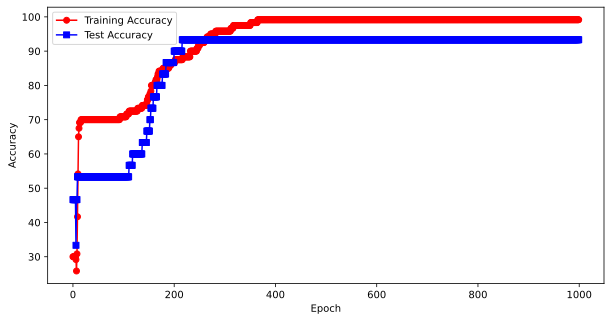

In [42]:
#plot the result
fig=plt.figure(figsize=(10,5))
plt.plot(trainAcc,'ro-')
plt.plot(testAcc,'bs-')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


  Now for the experiment

In [43]:
trainSetSizes=np.linspace(.2,.95,10)
allTrainAcc=np.zeros((len(trainSetSizes),numepochs))
allTestAcc=np.zeros((len(trainSetSizes),numepochs))
for i in range(len(trainSetSizes)):
  #create a model
  ANNiris,lossfun,optimizer=createANewModel()
  #train the model
  trainAcc,testAcc=trainTheModel(trainSetSizes[i])
  #store the result
  allTrainAcc[i,:]=trainAcc
  allTestAcc[i,:]=testAcc

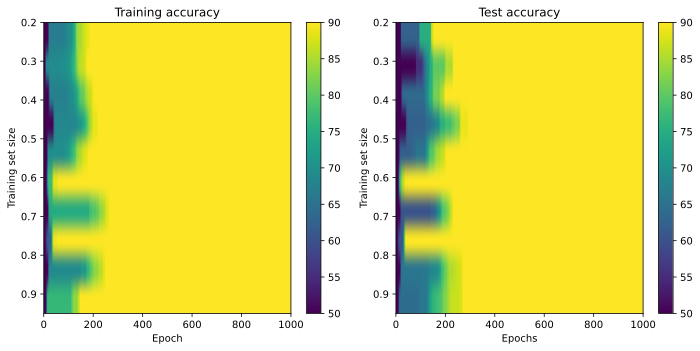

In [49]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
# Removed vmin and vmax, and used imshow instead of plot
im = ax[0].imshow(allTrainAcc, vmin=50, vmax=90, extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]], aspect='auto', origin='lower')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Training set size')
ax[0].set_title('Training accuracy')
# Removed vmin and vmax, and used imshow instead of plot
im2 = ax[1].imshow(allTestAcc, vmin=50, vmax=90, extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]], aspect='auto', origin='lower')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training set size')
ax[1].set_title('Test accuracy')
# Added colorbar for both subplots
fig.colorbar(im, ax=ax[0])
fig.colorbar(im2, ax=ax[1])
fig.tight_layout()
plt.show()